In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
dataset = [train,test]
train.shape

(891, 12)

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# formatting data
train['Age'] = train['Age'].fillna(train['Age'].median())
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
#change titles
#change the values of survived to yes, no
#preprocess cabin

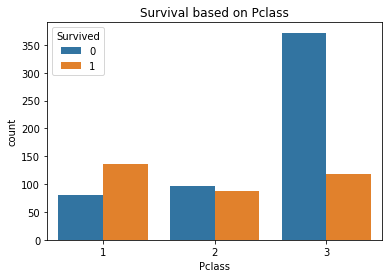

In [8]:
# survival based on pclass
plt.figure()
plt.title("Survival based on Pclass")
g = sn.countplot(x="Pclass", hue="Survived", data=train)
plt.show()

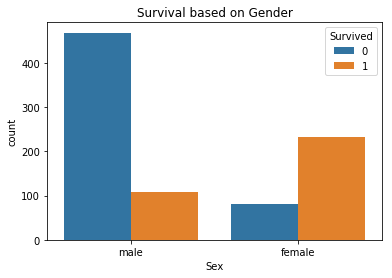

In [9]:
#ageVsSur = train.values#[['Age'],['Survived']].values
plt.figure()
plt.title("Survival based on Gender");
sn.countplot(x="Sex", hue="Survived", data=train)
plt.show()
# batter use pie chart

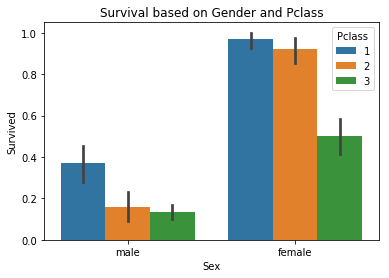

In [10]:
#gender vs survived
plt.figure()
plt.title("Survival based on Gender and Pclass");
sn.barplot(x="Sex", y="Survived", hue="Pclass", data=train)
plt.show()

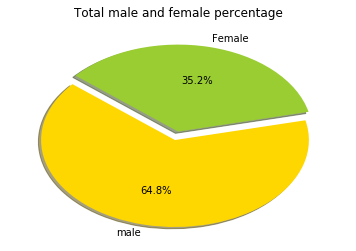

In [11]:
# male female group
plt.figure()
plt.title("Total male and female percentage")
# Data to plot
labels = 'male', 'Female'
sizes = [ np.count_nonzero(train['Sex']=='male'), np.count_nonzero(train['Sex']=='female')]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

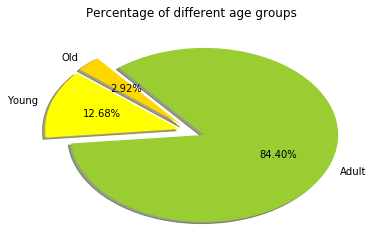

In [12]:
# passengers age group
le  = LabelEncoder()
agegroup = []
for age in train['Age']:
    if age<18:
        agegroup.append("Young")
    elif age<60:
        agegroup.append("Adult")
    else:
        agegroup.append("Old")
sizes=[]
cls = ['Young','Adult','Old']
for cl in cls:
    size = agegroup.count(cl)
    sizes.append(size)

#plooting
plt.figure()
plt.title("Percentage of different age groups")
labels = ['Young','Adult','Old']
colors = ['yellow','yellowgreen','gold']
explode = (0.1,0.1,0.1) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.show()

In [13]:
#preprocessing
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Cabin'] = train['Cabin'].fillna("A0") #consider some A0 cabin number
train['Embarked'] = train['Embarked'].fillna("0")

In [14]:
# as we can not give categorical data to model, convert categorical data to numerical data
def label_encoding(dataset,features):
    le = LabelEncoder()
    for feature in features:
        le.fit(dataset[feature])
        print(le.classes_)
        dataset[feature] = le.transform(dataset[feature])
    return dataset

train = label_encoding(train, ['Sex','Cabin','Embarked'])
#train.head()

['female' 'male']
['A0' 'A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34'
 'A36' 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B19' 'B20' 'B22' 'B28' 'B3'
 'B30' 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42' 'B49' 'B5' 'B50'
 'B51 B53 B55' 'B57 B59 B63 B66' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B78'
 'B79' 'B80' 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104' 'C106'
 'C110' 'C111' 'C118' 'C123' 'C124' 'C125' 'C126' 'C128' 'C148' 'C2'
 'C22 C26' 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52'
 'C54' 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C82' 'C83' 'C85' 'C86' 'C87'
 'C90' 'C91' 'C92' 'C93' 'C95' 'C99' 'D' 'D10 D12' 'D11' 'D15' 'D17' 'D19'
 'D20' 'D21' 'D26' 'D28' 'D30' 'D33' 'D35' 'D36' 'D37' 'D45' 'D46' 'D47'
 'D48' 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10' 'E101' 'E12' 'E121' 'E17'
 'E24' 'E25' 'E31' 'E33' 'E34' 'E36' 'E38' 'E40' 'E44' 'E46' 'E49' 'E50'
 'E58' 'E63' 'E67' 'E68' 'E77' 'E8' 'F E69' 'F G63' 'F G73' 'F2' 'F33'
 'F38' 'F4' 'G6' 'T']
['0' 'C' 'Q' 'S']


In [15]:
#normalization
def normalize_features(dataset, features):
    for feature in features:
        values = dataset[feature].tolist();
        mean = np.mean(values)
        std = np.std(values)
        values = values - mean/std
        dataset[feature] = values
        
    return dataset
    
train = normalize_features(train, ['Age', 'Fare'])

In [32]:
# training data is ready
X_train = train[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Embarked',]]
#fare, cabin features are removed since in test data, its values NaN
X_train = X_train.values
Y_train = train['Survived']
Y_train = Y_train.values

In [29]:
# metric
# Evaluationg the model
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=7)
model = LogisticRegressionCV()
clf = model.fit(x_train,y_train)
print(clf.score(x_train,y_train)*100)
predictions = model.predict(x_test)
print("Accuracy Score\n", accuracy_score(y_test,predictions))
print("Confusion Matrix\n", confusion_matrix(y_test,predictions))
print("Classification Report\n", classification_report(y_test,predictions))

81.6011235955
Accuracy Score
 0.754189944134
Confusion Matrix
 [[92 18]
 [26 43]]
Classification Report
              precision    recall  f1-score   support

          0       0.78      0.84      0.81       110
          1       0.70      0.62      0.66        69

avg / total       0.75      0.75      0.75       179



In [17]:
# preprocessing test data
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna("0")
test = label_encoding(test,['Sex','Embarked'])
test = normalize_features(test,['Age','Fare'])
X_test = test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Embarked',]]

['female' 'male']
['C' 'Q' 'S']


In [18]:
# model building
# model = LogisticRegressionCV()
clf = model.fit(X_train,Y_train)

In [19]:
#prediction
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0,